# Virtu Regression analysis 

This notebook contains analysis on Virtu Financial to predict its Market Making revenues for Q3 2020. Run the below cells to run the analysis. 

The main question we are trying to answer is `can we predict Market Making Net revenues based on market statistics for volatility and traded shares volumes?`.

What are the most important features? `Volatility or volumes?`

### First import the relevant libraries

In [185]:
from transform_data import *
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import Lasso, LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family'] = "Arial"

## Get revenue stats

In [186]:
financial = pd.read_csv('data/Financialstats.csv')[['Period','Net Revenues x 1M','FTEs']]
financial['book_y'] = financial['Period'].apply(lambda x: x[:4])
clrs = ['grey' if int(x) < 2020 else 'mediumspringgreen'#'mediumseagreen' 
        for x in np.array(financial.book_y)]
    

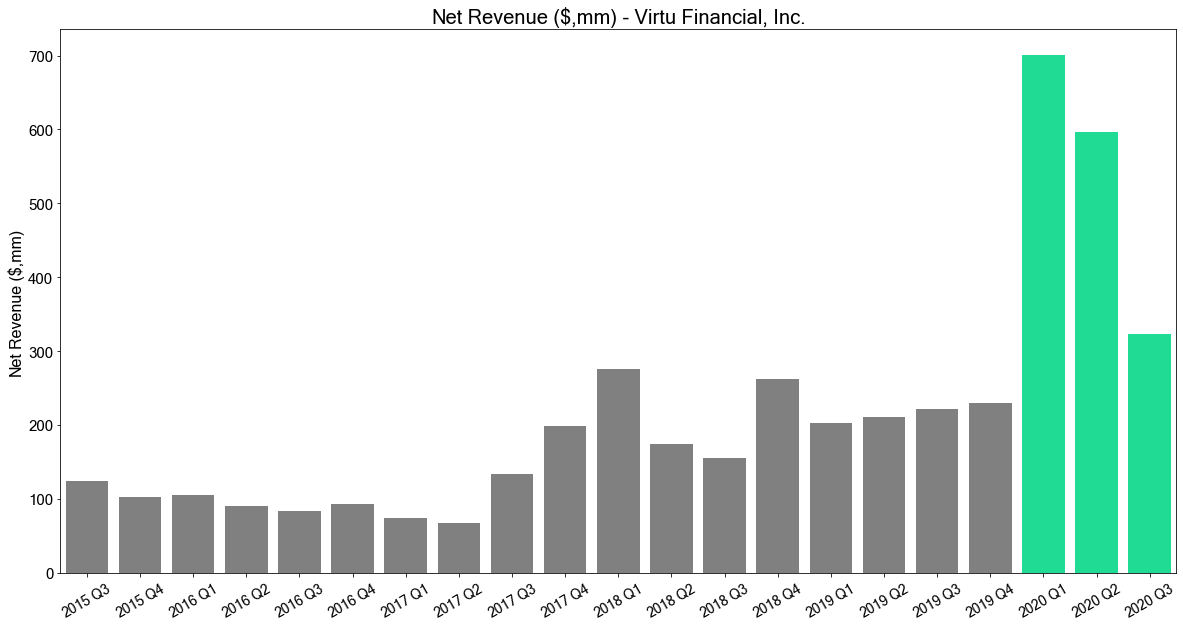

In [187]:
import matplotlib.pyplot as plt

x = financial['Period'].sort_values()
y1 = financial['Net Revenues x 1M']
y2 = financial['FTEs']

plt.rcParams['font.family'] = "Microsoft Sans Serif"
# plt.rcParams['font.sans-serif'] = ['Lucida Grande']
plt.figure(figsize=(20,10))

sns.barplot(y=y1,x = x , palette=np.sort(clrs))
# ax2 = plt.twinx()

# sns.lineplot(data=y2,x=x , color="b", ax=ax2)


plt.title('Net Revenue ($,mm) - Virtu Financial, Inc.',fontsize = 20)

plt.xlabel('',fontsize = 15)
plt.ylabel('Net Revenue ($,mm)', fontsize = 16)
plt.xticks(fontsize = 14,rotation=30)
plt.yticks(fontsize = 15)
# plt.y
plt.show()

####   import data from this different sources.  
`transform_data.py` does all the work for you :)

In [210]:
dataset = main()

dataset.head()

Tape A Shares  Tape B Shares  Tape C Shares  Total Shares  \
Year Quarter                                                              
2014 1         218004389262    73233107695   132332196259  423569693216   
     2         199004959843    58161601205   124147369352  381313930400   
     3         191904416827    58675128410   112780792650  363360337887   
     4         238679788982    86625040609   122927758045  448232587636   
2015 1         223228082104    82619646675   116014172636  421861901415   

              Tape A Notional  Tape B Notional  Tape C Notional  \
Year Quarter                                                      
2014 1           7.998452e+12     4.176053e+12     4.646509e+12   
     2           7.411509e+12     3.438243e+12     4.447935e+12   
     3           7.293479e+12     3.544884e+12     4.154735e+12   
     4           8.771632e+12     4.980334e+12     4.603058e+12   
2015 1           8.318730e+12     4.532320e+12     4.571723e+12   

              Total Notional  Tape A Trade Count  Tape B Trade Count  \
Year Quarter                                                           
2014 1          1.682101e+13          1101085823           209476206   
     2          1.529769e+13          1034826283           174143823   
     3          1.499310e+13           981464966           170953642   
     4          1.835502e+13          1246550274           259464752   
2015 1          1.742277e+13          1140037187           239998480   

              Tape C Trade Count  Total Trade Count  Month    Day  \
Year Quarter                                                        
2014 1                 612815292         1923377321   1919  15434   
     2                 607253516         1816223622   4683  14489   
     3                 551384863         1703803471   7154  14322   
     4                 622749086         2128764112   9842  13916   
2015 1                 580061411         1960097078   1632  12787   

              US Trading Days  Net Revenue  Virtu Days   NR per day  Flow  \
Year Quarter                                                                
2014 1                     61     165163.0        63.0  2621.634921  36.6   
     2                     63     153376.0        63.0  2434.539683  24.9   
     3                     64     162260.0        63.0  2575.555556  38.1   
     4                     64     204351.0        63.0  3243.666667  73.2   
2015 1                     61     213930.0        63.0  3395.714286  76.9   

                    VIX  
Year Quarter             
2014 1        14.347097  
     2        13.204098  
     3        13.355156  
     4        15.726308  
2015 1        16.694000

#### Virtu financial dataset
columns are: 

`year` = year 

`Quarter` = quarter

#### Tape information
The Consolidated Tape Association (CTA) oversees the dissemination of real-time trade and quote information in New York Stock Exchange LLC (Network A) and Bats, NYSE Arca, NYSE American and other regional exchange (Network B) listed securities and local listed (Network C) listed securities. 

`Tape A Shares` = count of shares traded Bats, NYSE Arca, NYSE American (Main exchanges) 

`Tape B Shares` = count of shares traded on regional exchanges

`Tape C Shares` = count of shares traded on local exchanges

`total Shares` = sum of all traded shares  

`Tape A Notional` = sum underlying value of the Tape A transactions. `Price share * share amount`

`Tape B Notional` = sum underlying value of the Tape B transactions. Price share * share amount

`Tape C Notional` = sum underlying value of the Tape C transactions. Price share * share amount

`Total Notional` = sum underlying value of all transactions. Price share * share amount

`Tape A Trade Count` = count of individual trades on Tape A

`Tape B Trade Count` = count of individual trades on Tape B

`Tape C Trade Count` = count of individual trades on Tape C 

`total Trade Count` = sum of all trades  

`US Trading Days` = number of trading days in a quarter

`Net Revenue` = Generated market making revenue as reported in the official quarterly reports. (This excludes income on execution services)

`NR per day` = `Net Revenue` / `US Trading Days`

`VIX` = averager recorded `VIX`. The Cboe Volatility Index, or VIX, is a real-time market index representing the market's expectations for volatility over the coming 30 days. Investors use the VIX to measure the level of risk, fear, or stress in the market when making investment decisions.





## Run OLS regression
As a first step in our analysis we are going to run an OLS regression to see what the most import features are in the dataset.

In [211]:
def run_ols_regression(x , y , data):
    
    # x = feauture columns 
    
    # y = target column 
    
    # data = dataframe
    
    x = data[x]

    y = data[y]
    
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x)
    
    results = model.fit() 
    
    y_pred = results.predict(x)
    
    data['predictions'] = y_pred
    
    r_2 = r2_score(y, y_pred)
    
    
    data = data.reset_index()
    
    data['Date'] = data.apply(lambda x: str(int(x['Year'])) + 'Q'+ str(int(x['Quarter'])), axis=1)
    data['Date'] = pd.to_datetime(data['Date'])
    return r_2, data , results.summary() 

In [215]:
feature_cols = ['Tape A Shares', 'Tape B Shares', 'Tape C Shares', 'Tape A Notional', 'Tape B Notional', 'Tape C Notional', 'VIX']
target_col = 'Net Revenue'

In [216]:
score, df , summary = run_ols_regression(feature_cols, target_col , dataset)

In [217]:
df

,Year,Quarter,Tape A Shares,Tape B Shares,Tape C Shares,Total Shares,Tape A Notional,Tape B Notional,Tape C Notional,Total Notional,...,Month,Day,US Trading Days,Net Revenue,Virtu Days,NR per day,Flow,VIX,predictions,Date
0,2014,1,218004389262,73233107695,132332196259,423569693216,7.998452e+12,4.176053e+12,4.646509e+12,1.682101e+13,...,1919,15434,61,165163.0,63.0,2621.634921,36.600,14.347097,182311.681407,2014-01-01
1,2014,2,199004959843,58161601205,124147369352,381313930400,7.411509e+12,3.438243e+12,4.447935e+12,1.529769e+13,...,4683,14489,63,153376.0,63.0,2434.539683,24.900,13.204098,156473.808663,2014-04-01
2,2014,3,191904416827,58675128410,112780792650,363360337887,7.293479e+12,3.544884e+12,4.154735e+12,1.499310e+13,...,7154,14322,64,162260.0,63.0,2575.555556,38.100,13.355156,154274.523187,2014-07-01
3,2014,4,238679788982,86625040609,122927758045,448232587636,8.771632e+12,4.980334e+12,4.603058e+12,1.835502e+13,...,9842,13916,64,204351.0,63.0,3243.666667,73.200,15.726308,229287.486584,2014-10-01
4,2015,1,223228082104,82619646675,116014172636,421861901415,8.318730e+12,4.532320e+12,4.571723e+12,1.742277e+13,...,1632,12787,61,213930.0,63.0,3395.714286,76.900,16.694000,237979.150690,2015-01-01
5,2015,2,211034015166,74068297295,115074740743,400177053204,7.936616e+12,3.904056e+12,4.556160e+12,1.639683e+13,...,4108,12701,63,169792.0,63.0,2695.111111,70.500,14.623016,185416.228348,2015-04-01
6,2015,3,243127000442,99518614946,125892156371,468537771759,8.493557e+12,5.108693e+12,5.195121e+12,1.879737e+13,...,6643,13572,64,206832.0,63.0,3283.047619,92.800,18.615758,264791.822738,2015-07-01
7,2015,4,245917106881,85237223006,120076721967,451231051854,8.307008e+12,4.487682e+12,4.686646e+12,1.748134e+13,...,9224,13033,64,166901.0,63.0,2649.222222,64.500,16.672222,230364.973702,2015-10-01
8,2016,1,278448739004,114285500196,128927450996,521661690196,8.556395e+12,5.213920e+12,4.864668e+12,1.863498e+13,...,1750,13146,61,186289.0,63.0,2956.968254,64.600,18.172881,214829.467755,2016-01-01
9,2016,2,247263509570,95584502099,121232472369,464080484038,8.045625e+12,4.411783e+12,4.422394e+12,1.687980e+13,...,4494,13958,64,166547.0,63.0,2643.603175,67.800,16.092540,173641.015563,2016-04-01


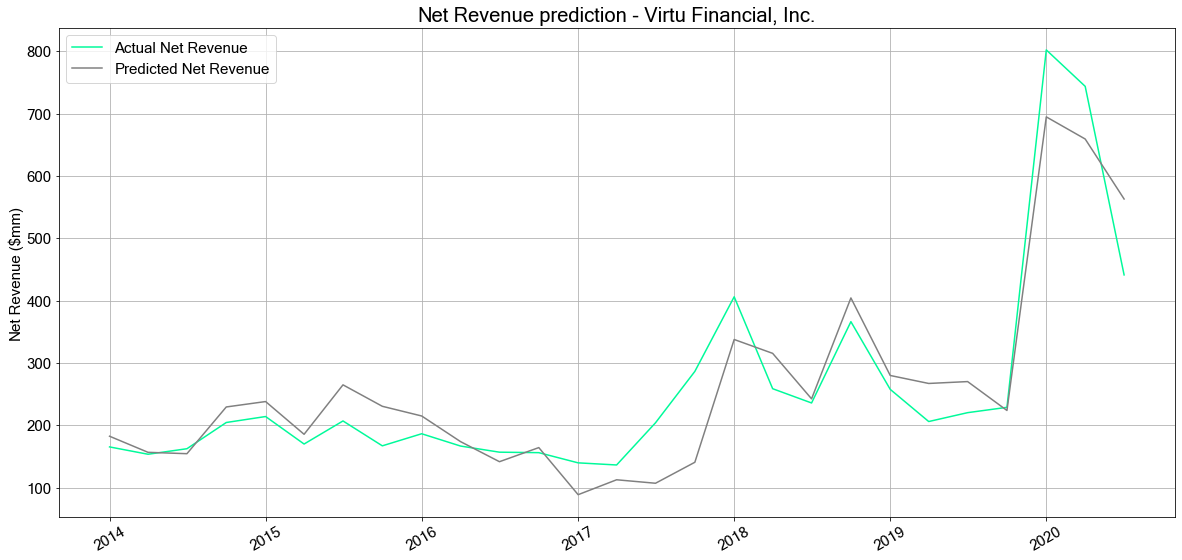

In [218]:
plt.figure(figsize=(20, 9))
# sns.lineplot(data=results, x='Date', y='Predicted ex', color='orange', label='Predicted Income - ex 2020')
sns.lineplot(data=df, x='Date', y=df['Net Revenue']/1000, color='mediumspringgreen', label='Actual Net Revenue')
sns.lineplot(data=df, x='Date', y=df['predictions']/1000, color='gray',label='Predicted Net Revenue')
plt.title('Net Revenue prediction - Virtu Financial, Inc.' , fontsize = 20)
plt.legend(fontsize = 15)
plt.ylabel('Net Revenue ($mm)', fontsize = 15)
plt.xlabel('',fontsize = 15)
plt.xticks(fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
plt.grid()
plt.show()

In [219]:
score

0.8702699426943625

#### Conclusions
- Seems that the VIX is the most important feature
- The rest of the features seem not to effect the data. Most likely due to multicollinearity

## Application of sk learn 
We are now going to check whether I can use the data to run a prediction for q3 2020 based on data from 2014 - 2019

In [220]:
trainset = dataset.copy().reset_index()


training_years = [2014, 2015, 2016, 2017, 2018,2019]

trainset = dataset.copy().reset_index()
trainset = trainset[trainset['Year'].isin(training_years)].set_index(['Year', 'Quarter'])

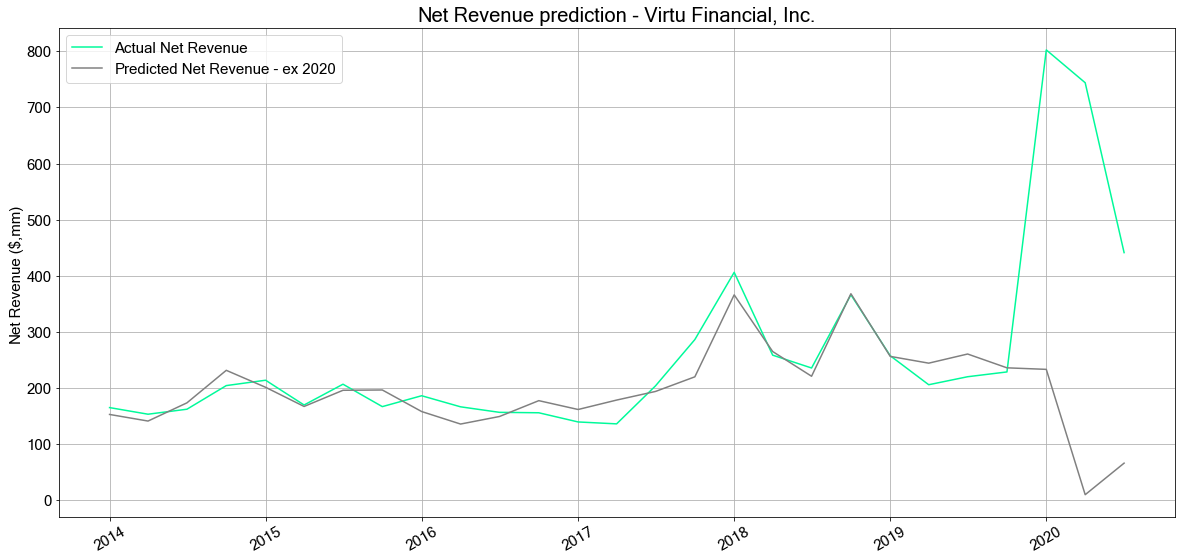

In [221]:
x = trainset[feature_cols]
y = trainset[target_col]

linear_regressor = LinearRegression()

linear_regressor.fit(x, y)

y_pred = linear_regressor.predict(dataset[feature_cols])

results = pd.DataFrame(dataset['Net Revenue'])
results['Predicted ex'] = y_pred

results = results.reset_index()

results['Date'] = results.apply(lambda x: str(int(x['Year'])) + 'Q'+ str(int(x['Quarter'])), axis=1)
results['Date'] = pd.to_datetime(results['Date'])

plt.figure(figsize=(20, 9))
sns.lineplot(data=results, x='Date', y=results['Net Revenue']/1000, color='mediumspringgreen', label='Actual Net Revenue')
sns.lineplot(data=results, x='Date', y=results['Predicted ex']/1000, color='gray', label='Predicted Net Revenue - ex 2020')
plt.title('Net Revenue prediction - Virtu Financial, Inc.' , fontsize = 20)
plt.legend(fontsize = 15)
plt.ylabel('Net Revenue ($,mm)', fontsize = 15)
plt.xlabel('',fontsize = 15)
plt.xticks(fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
plt.grid()
plt.show()

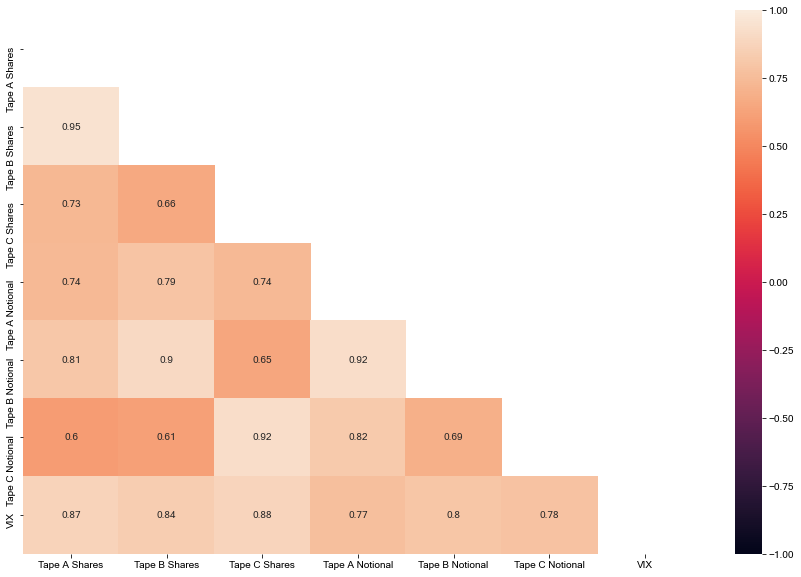

In [222]:
plt.rcParams["figure.figsize"]=(15,10)

mask = np.zeros_like(dataset[feature_cols].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset[feature_cols].corr(),vmin=-1,vmax=1,annot=True,mask=mask)
plt.show()

In [223]:
trainset = dataset.copy().reset_index()


training_years = [2014, 2015, 2016, 2017, 2018,2019]

trainset = dataset.copy().reset_index()
trainset = trainset[trainset['Year'].isin(training_years)].set_index(['Year', 'Quarter'])

X = trainset[feature_cols]
y = trainset[target_col]

lasso_clf_predictive = Lasso(normalize=True)
lasso_clf_predictive.fit(X, y)

# 

results = pd.DataFrame(dataset['Net Revenue'])
results['Predicted ex'] = lasso_clf_predictive.predict(dataset[feature_cols])

results = results.reset_index()

results['Date'] = results.apply(lambda x: str(int(x['Year'])) + 'Q'+ str(int(x['Quarter'])), axis=1)
results['Date'] = pd.to_datetime(results['Date'])

# results = pd.DataFrame(dataset['Net Revenue'])
# 


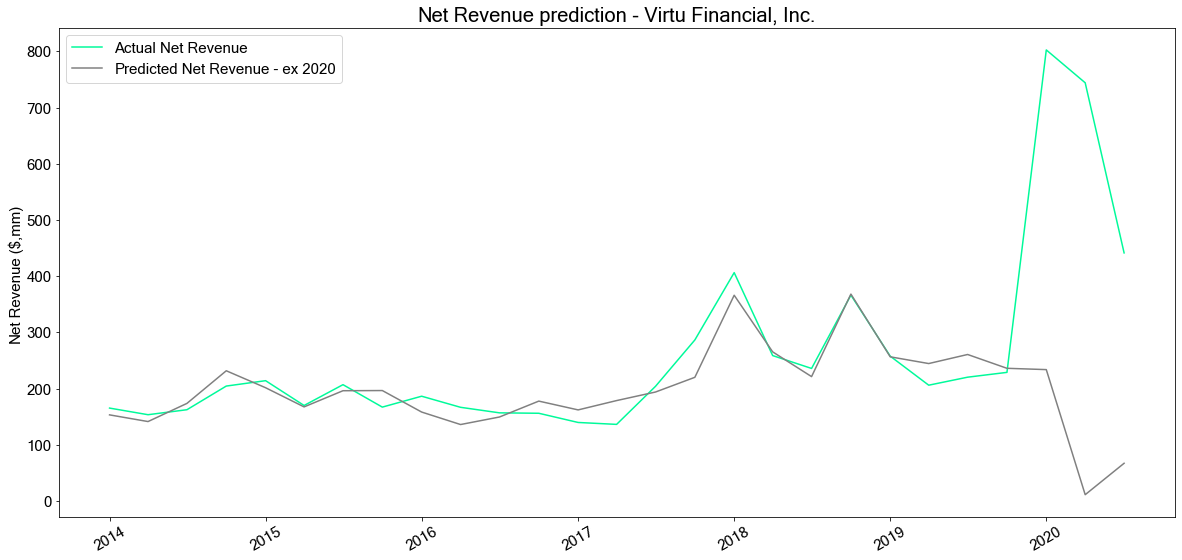

In [224]:
plt.figure(figsize=(20, 9))
sns.lineplot(data=results, x='Date', y=results['Net Revenue']/1000, color='mediumspringgreen', label='Actual Net Revenue')
sns.lineplot(data=results, x='Date', y=results['Predicted ex']/1000, color='gray', label='Predicted Net Revenue - ex 2020')
plt.title('Net Revenue prediction - Virtu Financial, Inc.' , fontsize = 20)
plt.legend(fontsize = 15)
plt.ylabel('Net Revenue ($,mm)', fontsize = 15)
plt.xlabel('',fontsize = 15)
plt.xticks(fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
plt.show()

#### conclusion
It seems that our model based on 2019 and prior data is underestimating the renevue. Lets check how our model will improve when using the Q1 and Q2 data as well. 

In [225]:
trainset = dataset.copy().reset_index()

trainset['period'] = trainset['Year'].astype(str) + trainset['Quarter'].astype(str)
trainset['period'] = trainset['period'].astype(int)

# trainset = dataset.copy().reset_index()

trainset = trainset[trainset['period']< 20203].set_index(['Year', 'Quarter'])

In [226]:
X = trainset[feature_cols]
y = trainset[target_col]

In [227]:
lasso_clf_predictive = Lasso(normalize=True)
lasso_clf_predictive.fit(X, y)

Lasso(normalize=True)

In [228]:
results = pd.DataFrame(dataset['Net Revenue'])
results['Predicted inc'] = lasso_clf_predictive.predict(dataset[feature_cols])
results = results.reset_index()

results['Date'] = results.apply(lambda x: str(int(x['Year'])) + 'Q'+ str(int(x['Quarter'])), axis=1)
results['Date'] = pd.to_datetime(results['Date'])

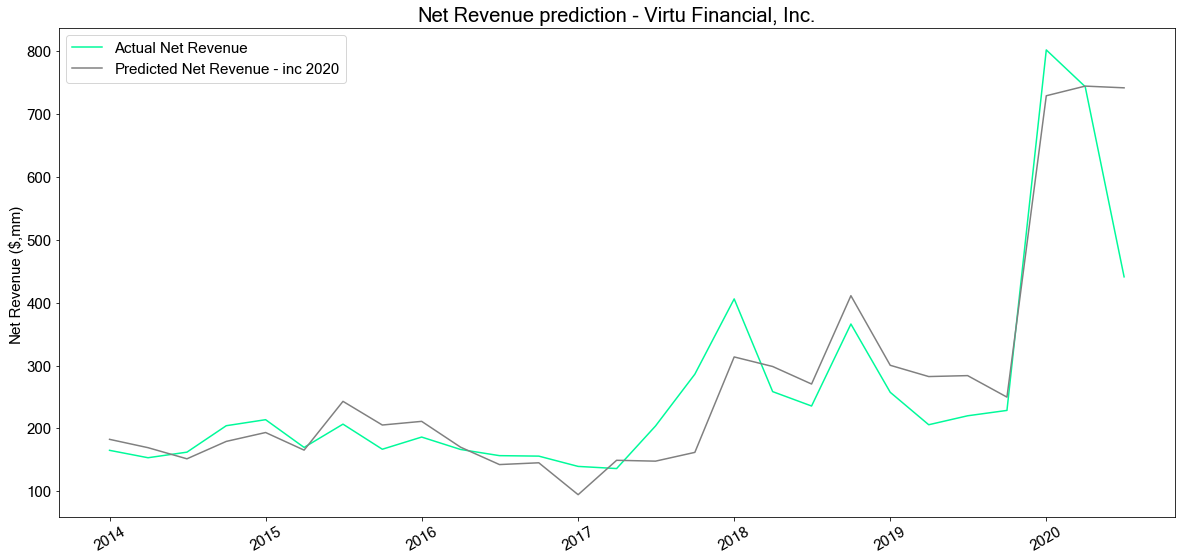

In [229]:
plt.figure(figsize=(20, 9))

sns.lineplot(data=results, x='Date', y=results['Net Revenue']/1000, color='mediumspringgreen', label='Actual Net Revenue')
sns.lineplot(data=results, x='Date', y=results['Predicted inc']/1000, color='grey',label='Predicted Net Revenue - inc 2020')

plt.title('Net Revenue prediction - Virtu Financial, Inc.' , fontsize = 20)
plt.legend(fontsize = 15)
plt.ylabel('Net Revenue ($,mm)', fontsize = 15)
plt.xlabel('',fontsize = 15)
plt.xticks(fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
plt.show()

#### How does the model behaves with another competitor

In [230]:
trainset = dataset.copy().reset_index()

target_col = 'Flow'

trainset['period'] = trainset['Year'].astype(str) + trainset['Quarter'].astype(str)
trainset['period'] = trainset['period'].astype(int)

# trainset = dataset.copy().reset_index()

trainset = trainset[trainset['period']< 20203].set_index(['Year', 'Quarter'])

X = trainset[feature_cols]
y = trainset[target_col]

lasso_clf_predictive = Lasso(normalize=True)
lasso_clf_predictive.fit(X, y)

results = pd.DataFrame(dataset['Flow'])
results['Predicted inc'] = lasso_clf_predictive.predict(dataset[feature_cols])
results = results.reset_index()

results['Date'] = results.apply(lambda x: str(int(x['Year'])) + 'Q'+ str(int(x['Quarter'])), axis=1)
results['Date'] = pd.to_datetime(results['Date'])

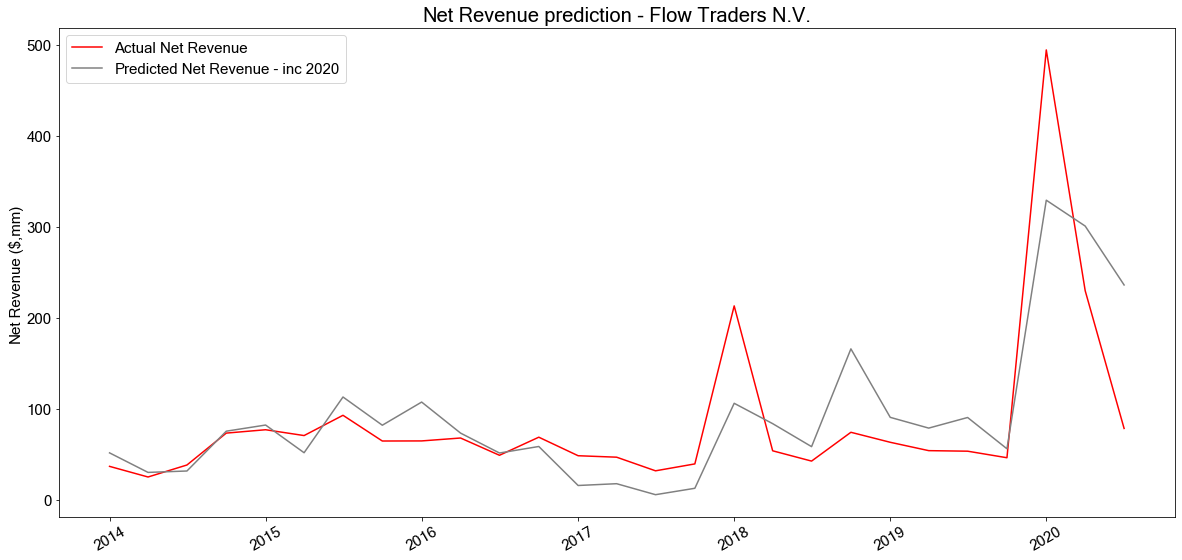

In [231]:
plt.figure(figsize=(20, 9))

sns.lineplot(data=results, x='Date', y=results['Flow'], color='red', label='Actual Net Revenue')
sns.lineplot(data=results, x='Date', y=results['Predicted inc'], color='grey',label='Predicted Net Revenue - inc 2020')

plt.title('Net Revenue prediction - Flow Traders N.V.' , fontsize = 20)
plt.legend(fontsize = 15)
plt.ylabel('Net Revenue ($,mm)', fontsize = 15)
plt.xlabel('',fontsize = 15)
plt.xticks(fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
plt.show()

In [232]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Net Revenue   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     18.21
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           3.49e-07
Time:                        15:05:13   Log-Likelihood:                -334.91
No. Observations:                  27   AIC:                             685.8
Df Residuals:                      19   BIC:                             696.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.094e+05   3.41e+05     -1.199      0.245   -1.12e+06    3.05e+05
Tape A Shares   -2.536e-09    2.7e-06     -0.001      0.999   -5.64e-06    5.64e-06
Tape B Shares   -2.457e-06   4.29e-06     -0.573      0.574   -1.14e-05    6.52e-06
Tape C Shares   -4.067e-07   2.29e-06     -0.178      0.861    -5.2e-06    4.38e-06
Tape A Notional  4.295e-08   7.45e-08      0.576      0.571   -1.13e-07    1.99e-07
Tape B Notional  1.445e-08   6.98e-08      0.207      0.838   -1.32e-07     1.6e-07
Tape C Notional  1.898e-08   3.24e-08      0.586      0.565   -4.88e-08    8.68e-08
VIX              2.327e+04   8227.513      2.829      0.011    6052.875    4.05e+04
==============================================================================
Omnibus:                        2.767   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                1.741
Skew:                           0.616   Prob(JB):                        0.419
Kurtosis:                       3.174   Cond. No.                     2.96e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Flow   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     10.67
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           5.82e-05
Time:                        14:39:54   Log-Likelihood:                -146.01
No. Observations:                  27   AIC:                             302.0
Df Residuals:                      22   BIC:                             308.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -52.1137    138.112     -0.377      0.710    -338.540     234.312
VIX                  20.2426      6.517      3.106      0.005       6.728      33.757
Total Shares      -3.215e-10   8.06e-10     -0.399      0.694   -1.99e-09    1.35e-09
Total Trade Count -1.037e-07   1.58e-07     -0.654      0.520   -4.32e-07    2.25e-07
Total Notional     9.215e-12   8.49e-12      1.086      0.289   -8.38e-12    2.68e-11
==============================================================================
Omnibus:                       11.475   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.918
Skew:                           1.025   Prob(JB):                      0.00258
Kurtosis:                       5.528   Cond. No.                     2.37e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""